In [107]:
import pandas as pd
import numpy as np
import matplotlib as mt
import sklearn as sk
import nltk

In [108]:
data = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [109]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 2.Data Cleaning
### 3 invalid columns
###  columns naming is not proper 
### so we will fix these 2 points first

In [110]:
data.shape

(5572, 5)

In [48]:
# 1. Data Cleaning
# 2. EDA
# 3. Data Preprocessing

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [50]:
# very few entries in third ,fourth and fifth column we will drop them

In [112]:
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [113]:
# renaming the columns
data = data.rename(columns={'v1':'target','v2':'text'})

In [114]:
#convert target to numerical value
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 


In [115]:
data['target'] = encoder.fit_transform(data['target'])

In [116]:
data.sample(5)

,target,text
2207,0,Usually the body takes care of it buy making s...
2210,0,Just wanted to say holy shit you guys weren't ...
5101,0,Nope thats fine. I might have a nap tho!
154,0,"You are everywhere dirt, on the floor, the win..."
91,0,Sorry to be a pain. Is it ok if we meet anothe...


In [117]:
#missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [118]:
#checking duplicate values
data.duplicated().sum()

403

In [119]:
#remove duplicate
data = data.drop_duplicates(keep = 'first')

In [120]:
data.duplicated().sum()

0

In [121]:
data.shape

(5169, 2)

## Exploratory Data Analysis

In [122]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x23c7f6b6c10>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

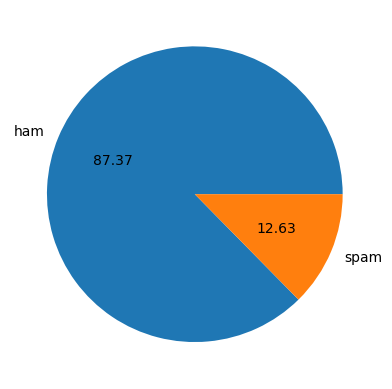

In [123]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

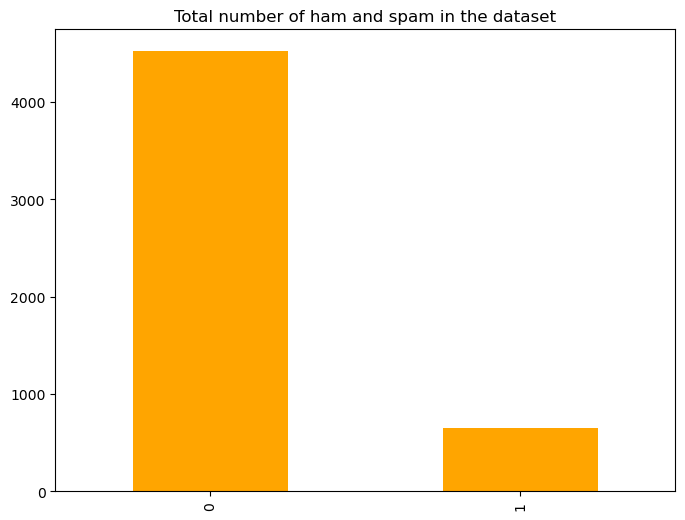

In [124]:

plt.figure(figsize=(8,6))

data['target'].value_counts().plot.bar(color = ["orange","orange"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [64]:
#Now we want to tokenize our mails into words ,alphabets and sentences
#we use nltk for this

# !pip install nltk


In [65]:
# nltk.download('punkt')

In [125]:
data['no_Of_Charaxters']=data['text'].apply(len)

In [126]:
data.head()

,target,text,no_Of_Charaxters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [127]:
# number of words
data['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [69]:

# import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer
# from imblearn.over_sampling import SMOTE

In [70]:
# import matplotlib.pyplot as plt
# plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [71]:
# plt.figure(figsize=(8,6))

# data['target'].value_counts().plot.bar(color = ["orange","orange"])
# plt.title('Total number of ham and spam in the dataset')
# plt.show()

In [128]:
#use length to count no of words
data['no_Of_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


# #from imblearn.over_sampling import SMOTE


# # Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

# # Load the dataset
# #df = pd.read_csv('path_to_your_spam_dataset.csv')  # Replace 'path_to_your_spam_dataset.csv' with the actual path to your dataset

# # Preprocess the text data
# stop_words = set(stopwords.words('english'))
# data['processed_text'] = data['text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stop_words]))  # Replace 'text_column' with the name of the column containing the text data

# # Separate the features and target variable
# X = data['processed_text']
# y = data['target']  # Replace 'target_column' with the name of your target column

# # Apply TF-IDF Vectorization
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(X)

# # Determine the current class distribution
# class_distribution = y.value_counts()

# # Calculate the target number of instances for the minority class
# target_spam_count = int(min(class_distribution) + (max(class_distribution) - min(class_distribution)) * 0.5)

# # Apply SMOTE to achieve the desired proportion
# smote = SMOTE(sampling_strategy={1: target_spam_count}, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check the class distribution after applying SMOTE
# resampled_class_distribution = y_resampled.value_counts(normalize=True)
# print("\nResampled Class Distribution:\n", resampled_class_distribution)

# print("Original Data Shape:", data.shape)
# print("Resampled Data Shape:", X_resampled.shape, y_resampled.shape)


In [129]:
data.head()

,target,text,no_Of_Charaxters,no_Of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [130]:
data['no_Of_Sentence']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [131]:
data.head()

,target,text,no_Of_Charaxters,no_Of_words,no_Of_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [75]:
#data['no_Of_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [132]:
data[['no_Of_Charaxters','no_Of_words','no_Of_Sentence']].describe()

,no_Of_Charaxters,no_Of_words,no_Of_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [133]:
#ham
data[data['target']==0][['no_Of_Charaxters','no_Of_words','no_Of_Sentence']].describe()

,no_Of_Charaxters,no_Of_words,no_Of_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [134]:
#spam
data[data['target']==1][['no_Of_Charaxters','no_Of_words','no_Of_Sentence']].describe()

,no_Of_Charaxters,no_Of_words,no_Of_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [135]:
import seaborn as sns


<Axes: xlabel='no_Of_Charaxters', ylabel='Count'>

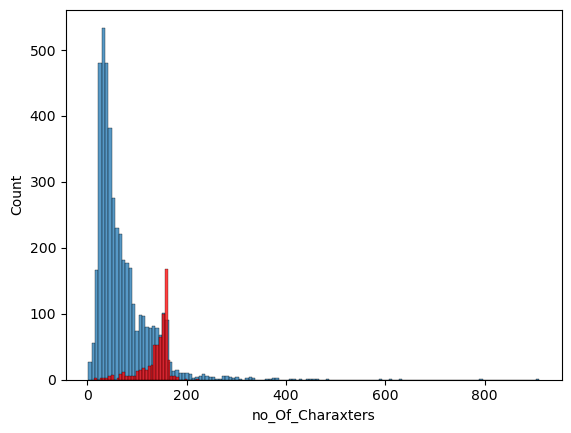

In [136]:
sns.histplot(data[data['target']==0]['no_Of_Charaxters'])
sns.histplot(data[data['target']==1]['no_Of_Charaxters'],color='red')

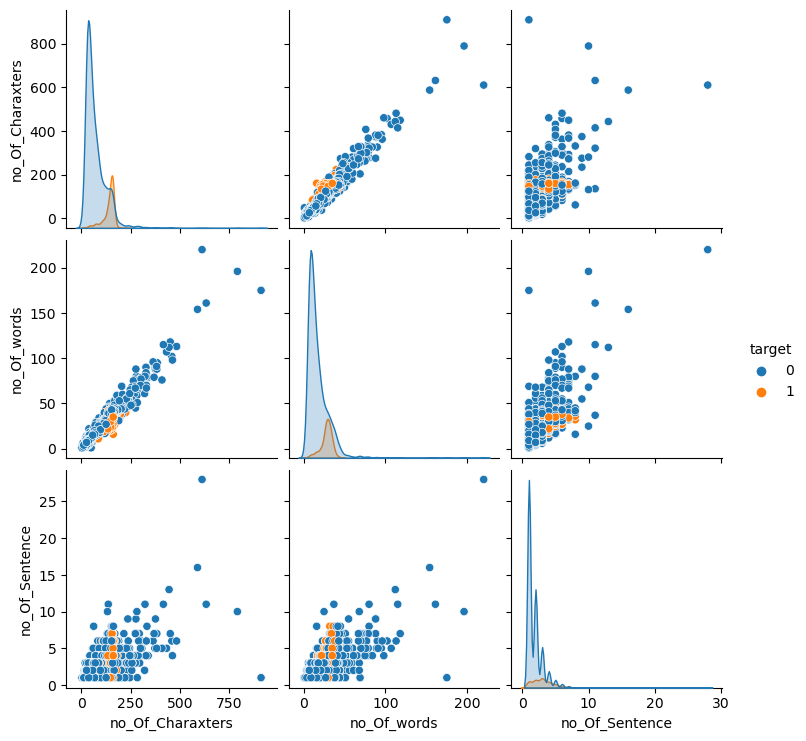

In [137]:
sns.pairplot(data,hue='target')

C:\Users\amardeep\AppData\Local\Temp\ipykernel_740\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

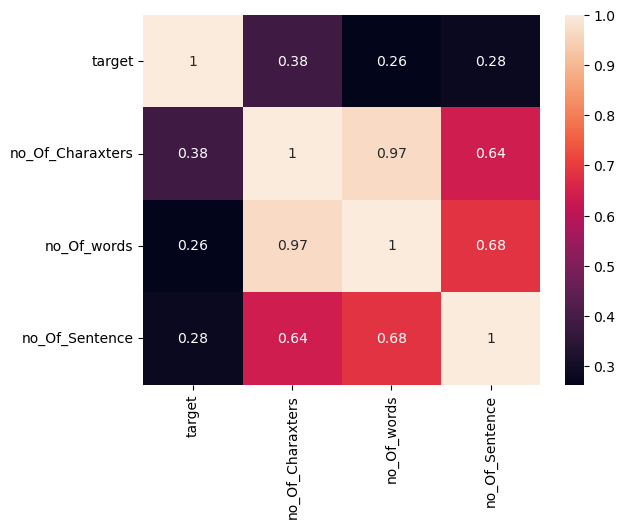

In [138]:
sns.heatmap(data.corr(),annot=True)

In [83]:
# Data Preprocessing
Lower Case
Tokenization
Removing special characters
Removing stop words
Stemming



In [139]:
def transform_text(text):
    text = text.lower();
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
            if i.isalnum():
                y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [140]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [141]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [142]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [143]:
transform_text('Hi how Are loving learning you %% eg')

'hi love learn eg'

In [144]:
data['transformed_text'] = data['text'].apply(transform_text)

In [ ]:
#!pip install wordcloud



In [145]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000,height = 1000,min_font_size=10,background_color='white' )

In [146]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

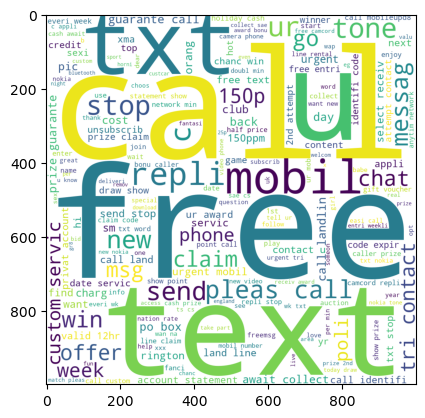

In [147]:
plt.imshow(spam_wc)

In [148]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

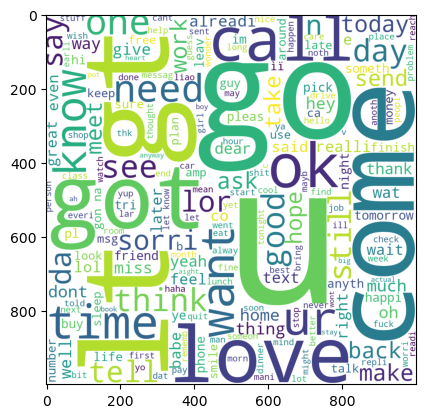

In [149]:
plt.imshow(spam_wc)

In [150]:
data.head()

,target,text,no_Of_Charaxters,no_Of_words,no_Of_Sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [151]:
spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [152]:
len(spam_corpus)

9939

In [153]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)[0]))
# plt.xticks(rotation = 'vertical')
# plt.show()

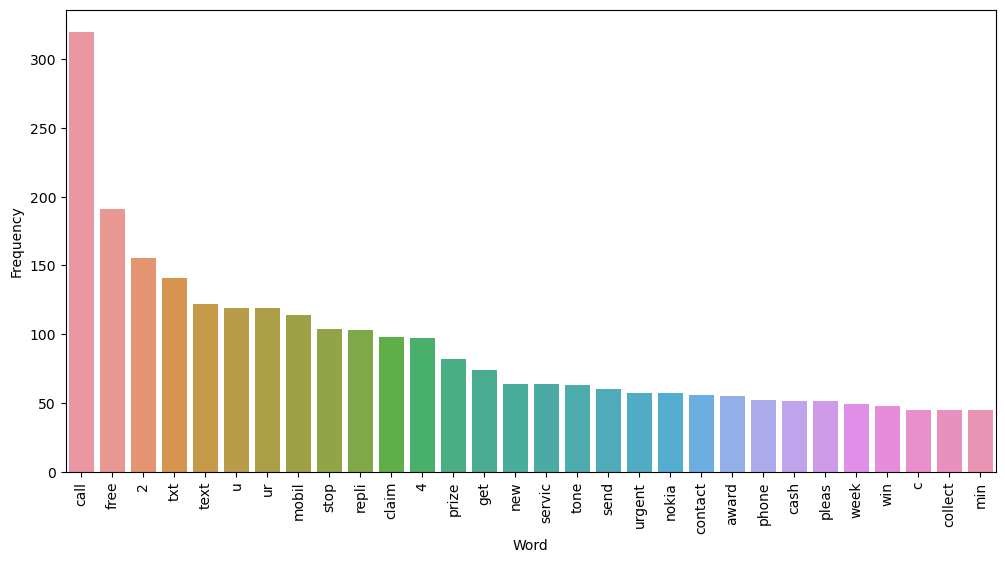

In [154]:


# Assuming spam_corpus is your list of words
spam_counter = Counter(spam_corpus)
most_common_words = dict(spam_counter.most_common(30))

# Convert the dictionary to a DataFrame
df_most_common = pd.DataFrame(list(most_common_words.items()), columns=['Word', 'Frequency'])

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=df_most_common)
plt.xticks(rotation=90)
plt.show()


In [155]:
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [156]:
len(ham_corpus)

35394

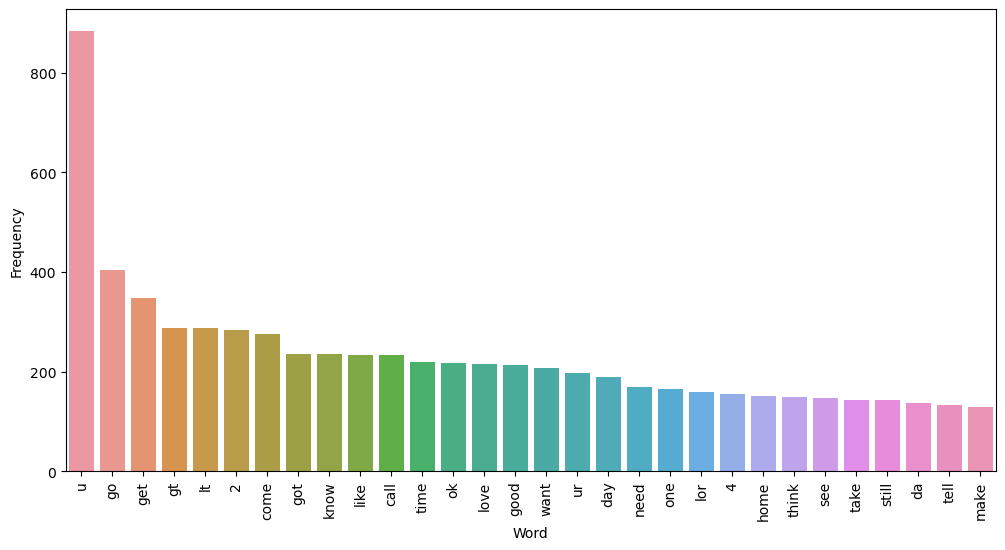

In [157]:
# Assuming spam_corpus is your list of words
ham_counter = Counter(ham_corpus)
most_common_words = dict(ham_counter.most_common(30))

# Convert the dictionary to a DataFrame
df_most_common = pd.DataFrame(list(most_common_words.items()), columns=['Word', 'Frequency'])

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=df_most_common)
plt.xticks(rotation=90)
plt.show()

## Model Building

In [158]:
data.head()

,target,text,no_Of_Charaxters,no_Of_words,no_Of_Sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer()

In [160]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [161]:
X.shape

(5169, 6708)

In [162]:
y = data['target'].values

In [163]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [1]:
series = pd.Series(y)
result = series.value_counts()

#print(result)


class_distribution = y.value_counts()

# Calculate the target number of instances for the minority class
target_spam_count = int(min(class_distribution) + (max(class_distribution) - min(class_distribution)) * 0.5)

# Apply SMOTE to achieve the desired proportion
smote = SMOTE(sampling_strategy={1: target_spam_count}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
resampled_class_distribution = y_resampled.value_counts(normalize=True)
print("\nResampled Class Distribution:\n", resampled_class_distribution)

print("Original Data Shape:", data.shape)
print("Resampled Data Shape:", X_resampled.shape, y_resampled.shape)


NameError: name 'pd' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


In [ ]:
#tfidf-->mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [ ]:
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
svc = SVC(kernel = 'sigmoid',gamma=1.0)
rfc =  RandomForestClassifier(n_estimators = 50 , random_state = 42)
mnb =  MultinomialNB()

In [ ]:
clfs = {
    'SVC' : svc,
    'LR' : lrc,
    'RFC' : rfc,
    'MNB' : mnb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision =  train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy -  ",current_accuracy)
    print("Precision -  ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    
    

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy ':accuracy_scores,'Precision ':precision_scores})

In [ ]:
performance_df

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))